In [9]:
import os
import pandas as pd
import datetime 
import tweepy as tw #twitter
import sys
import re #regex
import seaborn as sns #graficos
import matplotlib.pyplot as plt #graficos
import matplotlib.colors as mcolors

from collections import Counter #frecuencia 
import numpy as np


In [4]:
#instala tweepy en el kernel de jupyter
#!{sys.executable} -m pip install tweepy
#!{sys.executable} -m pip install --upgrade tweepy


In [6]:
#https://docs.python.org/3/library/re.html
#re.compile : Compilq un patrón de expresión regular en un objeto de expresión regular, que se puede utilizar para hacer match
#re.sub :reemplaza en la cadena la ocurrencias del patron por otro string
#https://regex101.com/r/BiIIHr/1

#funcion que limpia el texto de caracteres no alfanumericos, hashtags, menciones, urls y palabras no significativas
def clean_text(lista):
    tweet_set = []
    for t in lista:


        #elimina emojis y simbolos
        emoji_pattern = re.compile(pattern = "["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
            u"\U00002500-\U00002BEF"  # chinese char
            u"\U00002702-\U000027B0"
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u"\U00010000-\U0010ffff"
            u"\u2640-\u2642" 
            u"\u2600-\u2B55"
            u"\u200d"
            u"\u23cf"
            u"\u23e9"
            u"\u231a"
            u"\ufe0f"  # dingbats
            u"\u3030"
                               "]+", flags = re.UNICODE)


        t = re.sub(emoji_pattern,r'',t)

        #elimina urls
        url_pattern = re.compile(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?')
        t = re.sub(url_pattern,'',t)    


        #elimina menciones
        menciones_pattern = re.compile( '@[^\s]+')
        t = re.sub(menciones_pattern,'',t)

        #elimina hashtags 
        hashtag_pattern = re.compile( '#[^\s]+')
        t = re.sub(hashtag_pattern,'',t)


        #elimina todo lo que no sea alfanumerico - https://stackoverflow.com/questions/875968/how-to-remove-symbols-from-a-string-with-python
        t = re.sub(r'[^\w]', r' ', t)

        #https://stackoverflow.com/questions/31273642/better-way-to-remove-multiple-words-from-a-string/31273749
        #elimina palabras poco significativas
        # re.I: realiza match de palabras en forma NO CASE SENSITIVE
        palabras = ['no','sí','si','al','para','el', 'ella', 'ellos', 'ellas', 'él', 'la', 'las','lo','los', 'le','les', 'y', 'o', 'a', 'me', 'mí', 'mi', 'tu','tus','tú', 'te','ti','se', 'de','del','su','sus', 'mas','más', 'un','unos', 'este', 'en', 'una', 'por', 'que','qué','es', 'rt','con','vs','tw']
        palabras_pattern = re.compile( r'\b(' + '|'.join(palabras) +')\\W', re.I)
        t = palabras_pattern.sub('',t)


        #elimina letras sueltos
        t = re.sub(r'\b[a-zA-Z]\b', '', t)

        #https://stackoverflow.com/questions/817122/delete-digits-in-python-regex
        #elimina numeros
        t = re.sub(r'\w*\d+\w*', ' ', t)

        tweet_set.append(t.lower())
        
    return tweet_set

#tweet_set

In [7]:
#funcion que se encarga de "soltar" las palabras
def split_text(tweet_set):

    s = []

    for t in tweet_set:
        s = s + t.split()

    return s

In [8]:
#grafico de frecuencia - countplot de seaborn
def countplot(dataframe):

    plt.figure(figsize = (100, 20))
    frecuencia = sns.countplot(x='palabras', 
                               data=dataframe,
                               order = dataframe['palabras'].value_counts().index)

    for p in frecuencia.patches:
        frecuencia.annotate(p.get_height(), 
                            (p.get_x() + p.get_width() / 2.0, 
                             p.get_height()), 
                            ha = 'center', 
                            va = 'center', 
                            xytext = (0, 5),
                            textcoords = 'offset points')

    plt.setp(frecuencia.get_xticklabels(), rotation=90)

    plt.title("Frecuencia de palabras en el conjunto de tweets")
    plt.xlabel("Palabras")
    plt.ylabel("Frecuencia")

    plt.show()
    

In [7]:
#grafico de barras - top 30
def barplot(lista): #lista de palabras
    
    distribution = Counter(lista) #retorna diccionario

    #dataframe1 = pd.DataFrame(list(distribution.items()))
    #dataframe1 = dataframe1.rename(columns={0:'Palabras', 1:'Frecuencia'})
    
    #tamanho de fuente
    plt.rcParams.update({'font.size': 22})

    #top 30 palabras mas repetidas
    top_words = distribution.most_common(50) #retorna lista de tuplas
    words = [w[0] for w in top_words]
    count = [c[1] for c in top_words]

    height = np.arange(len(words))
    
    #colores - cuidado... 
    clist = [(0, "purple"), (0.125, "red"), (0.25, "orange"), (0.5, "yellow"),(0.7, "green"), (0.75, "blue"), (1, "black")]
    rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
    N = 60
    x = np.arange(N).astype(float)
    y = np.random.uniform(0, 5, size=(N,))

    #armando figura
    plt.figure(figsize=(30,20))  
    #plt.bar(height, count, align='center')
    plt.bar(height, count, align='center', color=rvb(x/N))
    plt.xticks(height, words, rotation=70)
    plt.ylabel('Frecuencia')
    
    #etiquetas
    for i in range(len(words)):
        plt.text(i, count[i], count[i], ha='center')
    
  
    #acostado...
    #plt.barh(words,count)
    #plt.xticks(rotation=90)
    
   
    plt.show()

In [54]:
#grafico de barras - top 30
def barplot_2(x,y): #lista de palabras
    
   
    plt.rcParams.update({'font.size': 22})

    height = np.arange(len(x))
    
    #armando figura
    plt.figure(figsize=(30,20))  
    plt.bar(height, y, align='center')
    plt.xticks(height, x, rotation=70)
    plt.ylabel('Frecuencia')
    plt.xlabel('Fechas')
    
    #etiquetas
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')
    
    plt.show()

In [3]:
consumer_key = '#'
consumer_secret = '#'
bearer_token = '#'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
api = tw.API(auth, wait_on_rate_limit=True)
#wait_on_rate_limit_notify=True

In [18]:
#1. timeline de un usuario
username = 'ABCDigital'
resultados_1 = tw.Cursor(api.user_timeline,
                        screen_name = username,
                        tweet_mode='extended').items(5000)

#guardando resultado en una lista
user_timeline_tweets = []
user_timeline_tweets.extend(resultados_1)

%store user_timeline_tweets

#user_timeline_tweets

Stored 'user_timeline_tweets' (list)


In [19]:
%store -r user_timeline_tweets 

#obtencion del texto
user_timeline = [t.full_text for t in user_timeline_tweets]
user_timeline = clean_text(user_timeline)
%store user_timeline
#user_timeline

Stored 'user_timeline' (list)


In [20]:
%store -r user_timeline

#separar palabras
set_1 = split_text(user_timeline)
%store set_1

#print(set_1)

Stored 'set_1' (list)


### frecuencia de palabras del conjunto 1

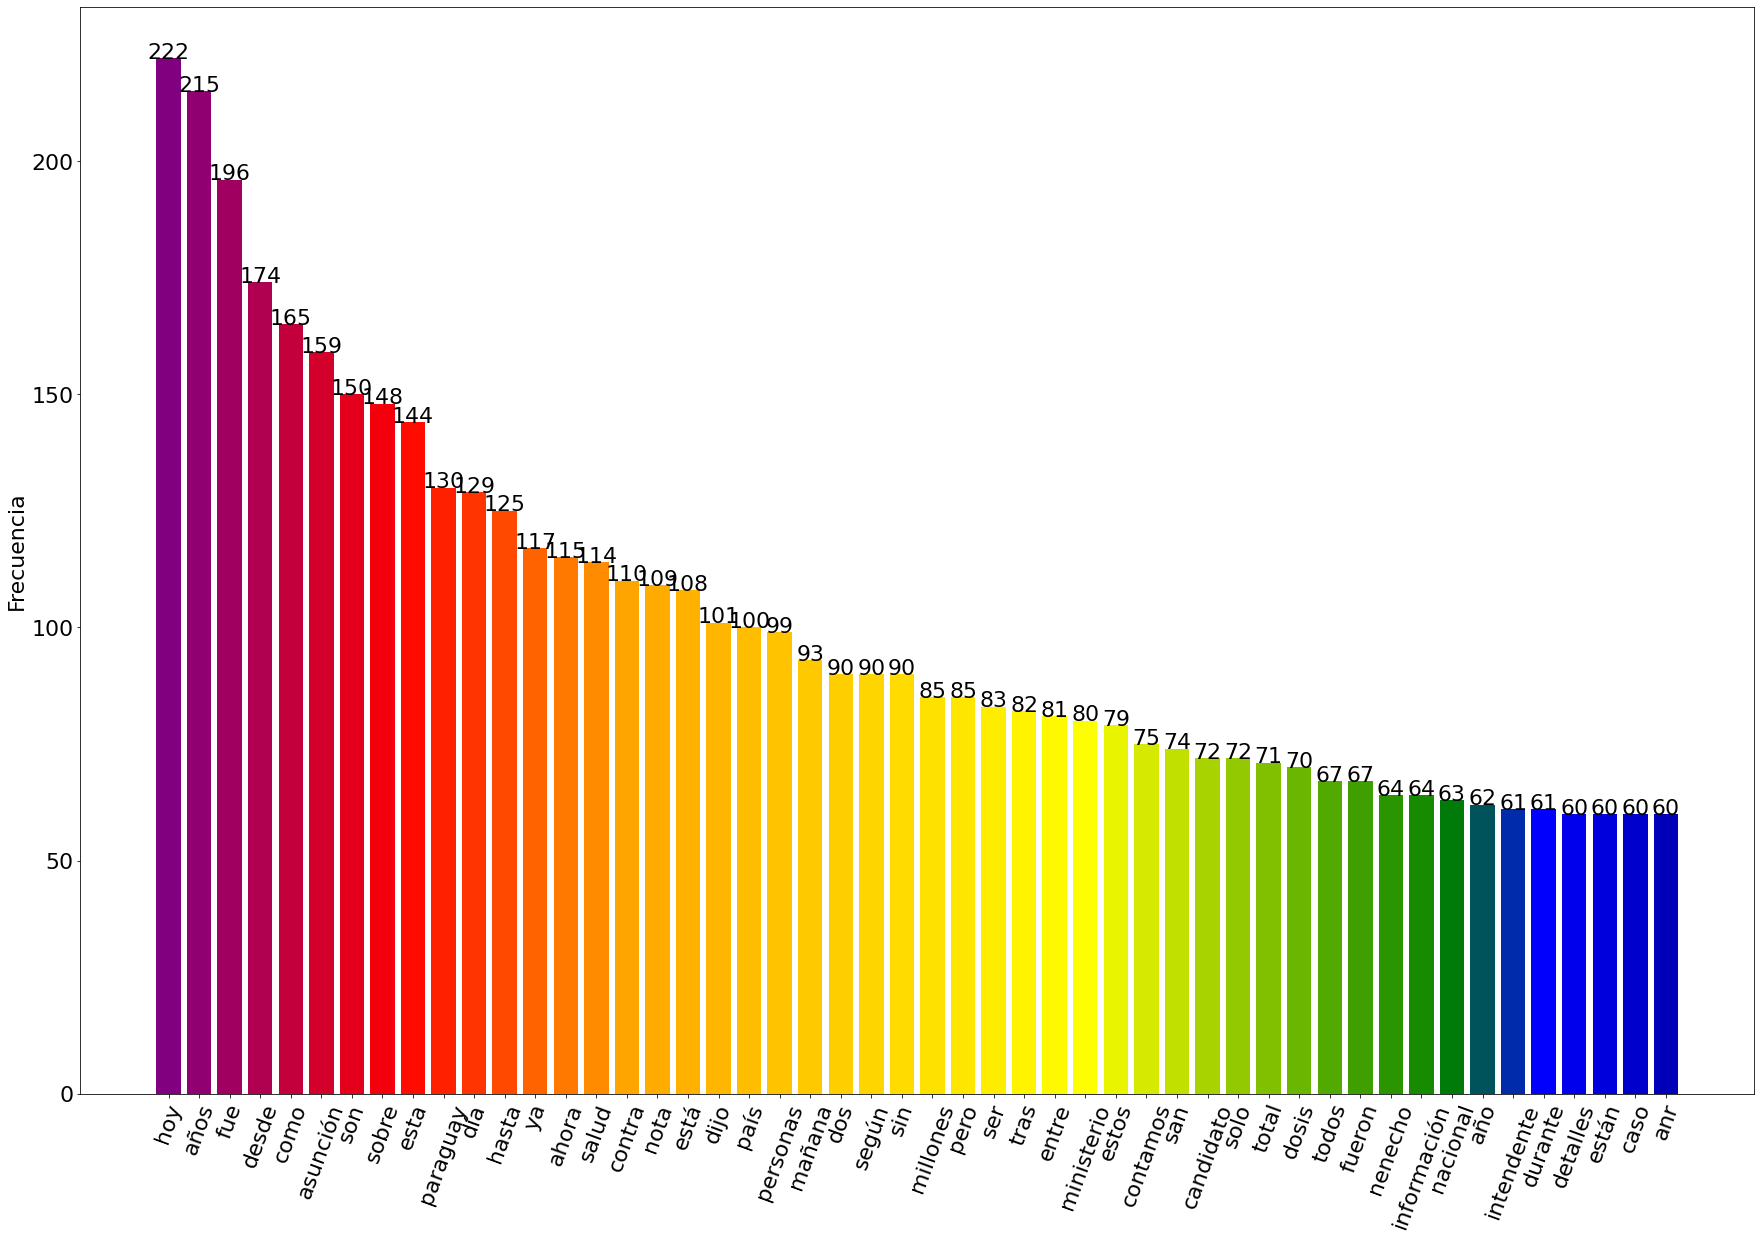

In [23]:
#top 20 de palabras
barplot(set_1)

In [268]:
#todas las palabras - ojo: toma mucho tiemp generar grafico
#dataframe = pd.DataFrame(set_1, columns =['palabras'])
#dataframe.head()
#countplot(dataframe)

In [269]:
#https://www.delftstack.com/es/howto/seaborn/seaborn-save-figure/
#f = frecuencia.get_figure()
#f.savefig('frecuencia.pdf',  orientation="landscape")

In [92]:
#2. Escribir una palabra de su interés y recuperar todos los tweets que contengan dicha palabra dentro de un rango de fechas. Conjunto 2 de tweets.

since = datetime.datetime(2021,10,7)
until = datetime.datetime(2021,10,12)
#geocode= "-23.858436,-56.329842,1500mi"

query = 'virus since:' + str(since)+ ' until:' + str(until)
#query = 'virus until:' + str(until)

str_since = str(since.date)
resultados_2 = tw.Cursor(api.search_tweets, 
                   q=query,
                   tweet_mode='extended',
                   #geocode = geocode,
                   #count='7000',      
                   lang='es').items()

tweets = []
tweets.extend(resultados_2)

%store tweets
#tweets
len(tweets)

Stored 'tweets' (list)


84

In [40]:
#obtencion del texto de los tweets
%store -r tweets
tweets_text = [t.full_text for t in tweets]
%store tweets_text
#tweets_text

Stored 'tweets_text' (list)


In [41]:
#limpieza
%store -r tweets_text
cleaned_tweets_text = clean_text(tweets_text)
%store cleaned_tweets_text

Stored 'cleaned_tweets_text' (list)


In [44]:
#palabras sueltas
%store -r cleaned_tweets_text
set_2 = split_text(cleaned_tweets_text)
%store set_2
#print(set_2)


Stored 'set_2' (list)


### frecuencia de palabras del conjunto 2

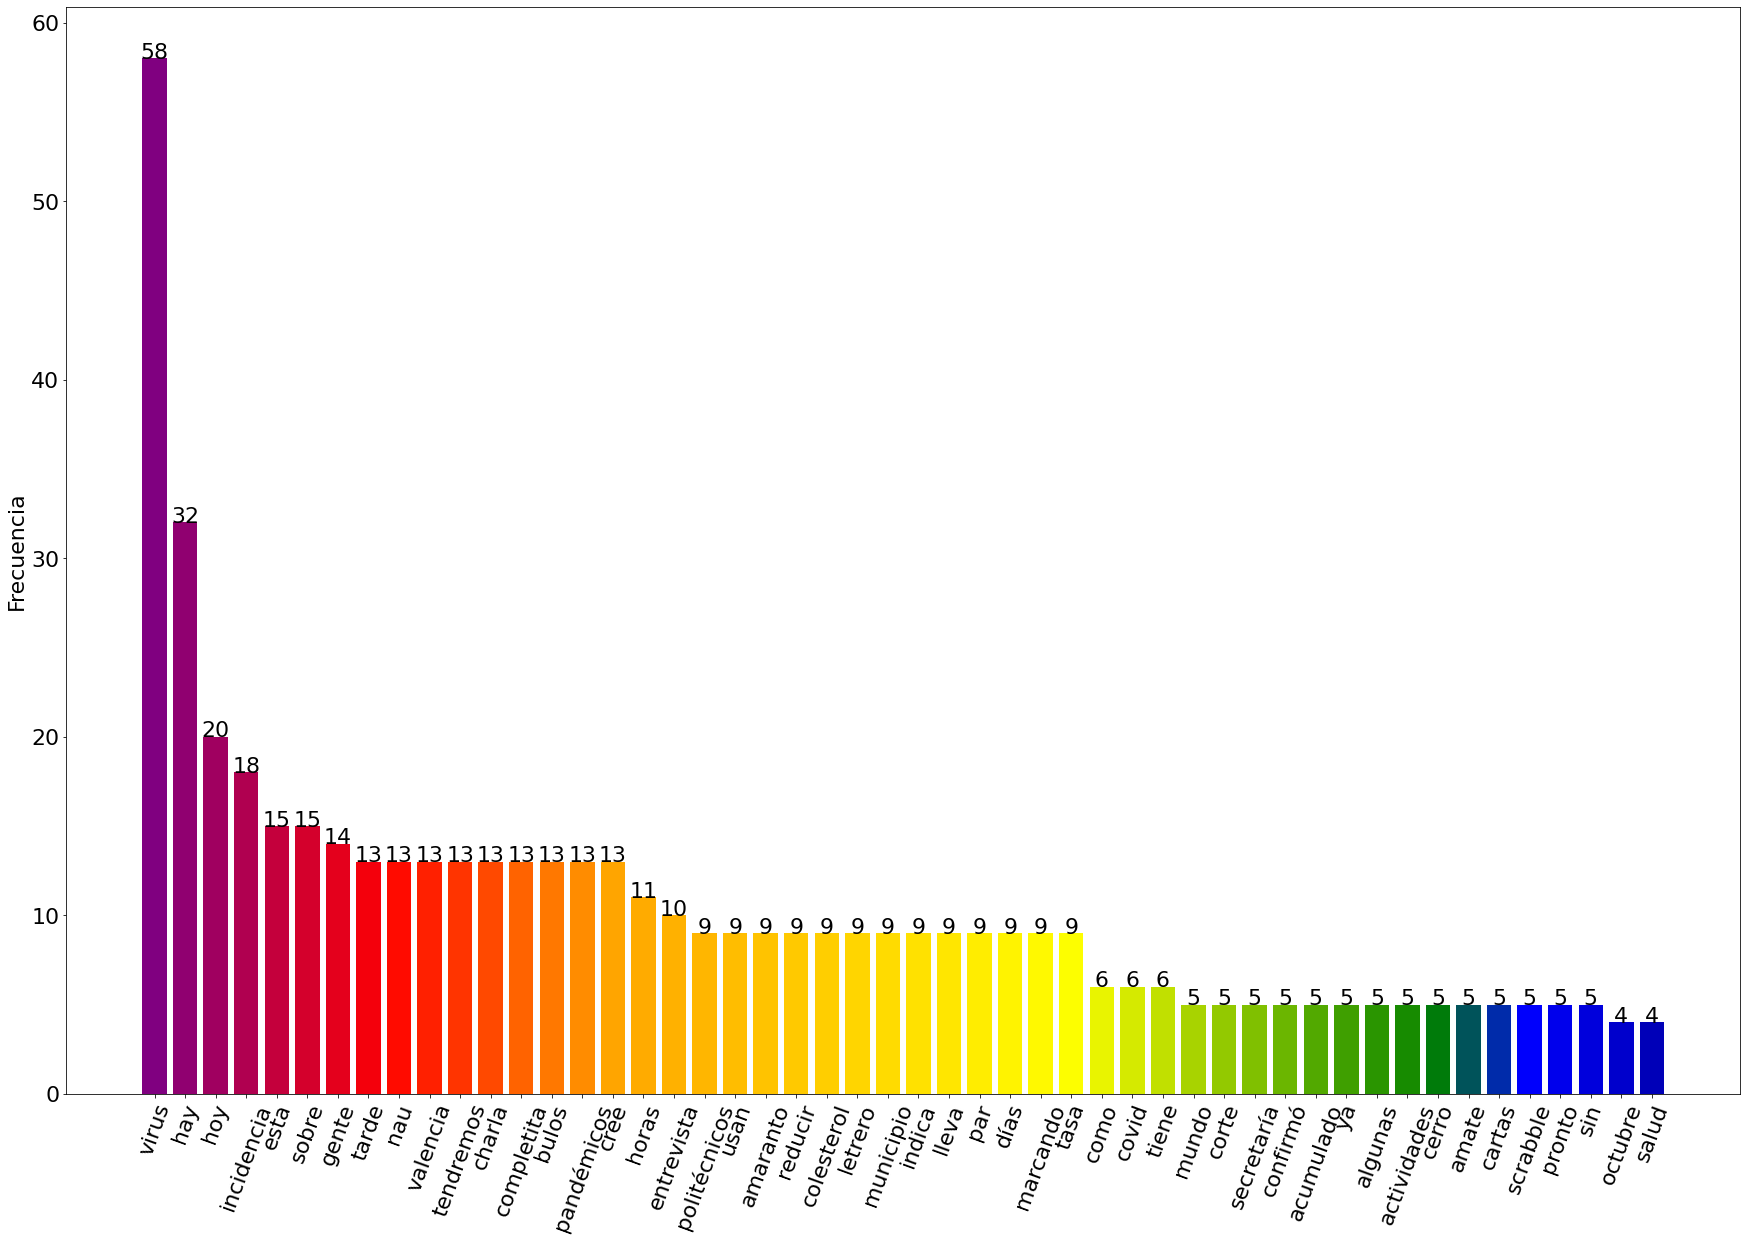

In [45]:
%store -r set_2
barplot(set_2)

In [275]:
#%store -r set_2
#dataframe2 = pd.DataFrame(set_2, columns =['palabras'])
#dataframe2.head()

In [276]:
#grafico de frecuencia completo - cuidado tarda mucho....
#la cofiguracion de tamanho de fuente en barplot tambien afecta a countplot
#countplot(dataframe2)

In [47]:
%store -r set_2
%store -r set_1
#interseccion del conjunto 1 y el conjunto 2
interseccion = list(set(set_1) & set(set_2))

#eliminar palabra de menos de tres letras
for i in interseccion:
    if len(i) < 3:
        interseccion.remove(i)


%store interseccion
#print(interseccion)

Stored 'interseccion' (list)


In [48]:
%store -r interseccion
%store -r set_1
%store -r set_2

#calcular la frecuencia de la interseccion

lista_interseccion = []

for i in interseccion:
    for s1 in set_1:
        if i == s1:
            lista_interseccion.append(i)
       
    for s2 in set_2:
        if i == s2:
            lista_interseccion.append(i)
       
            
            
%store lista_interseccion            

#countplot( pd.DataFrame(interseccion, columns =['palabras']))

Stored 'lista_interseccion' (list)


### frecuencia de palabras de la interseccion

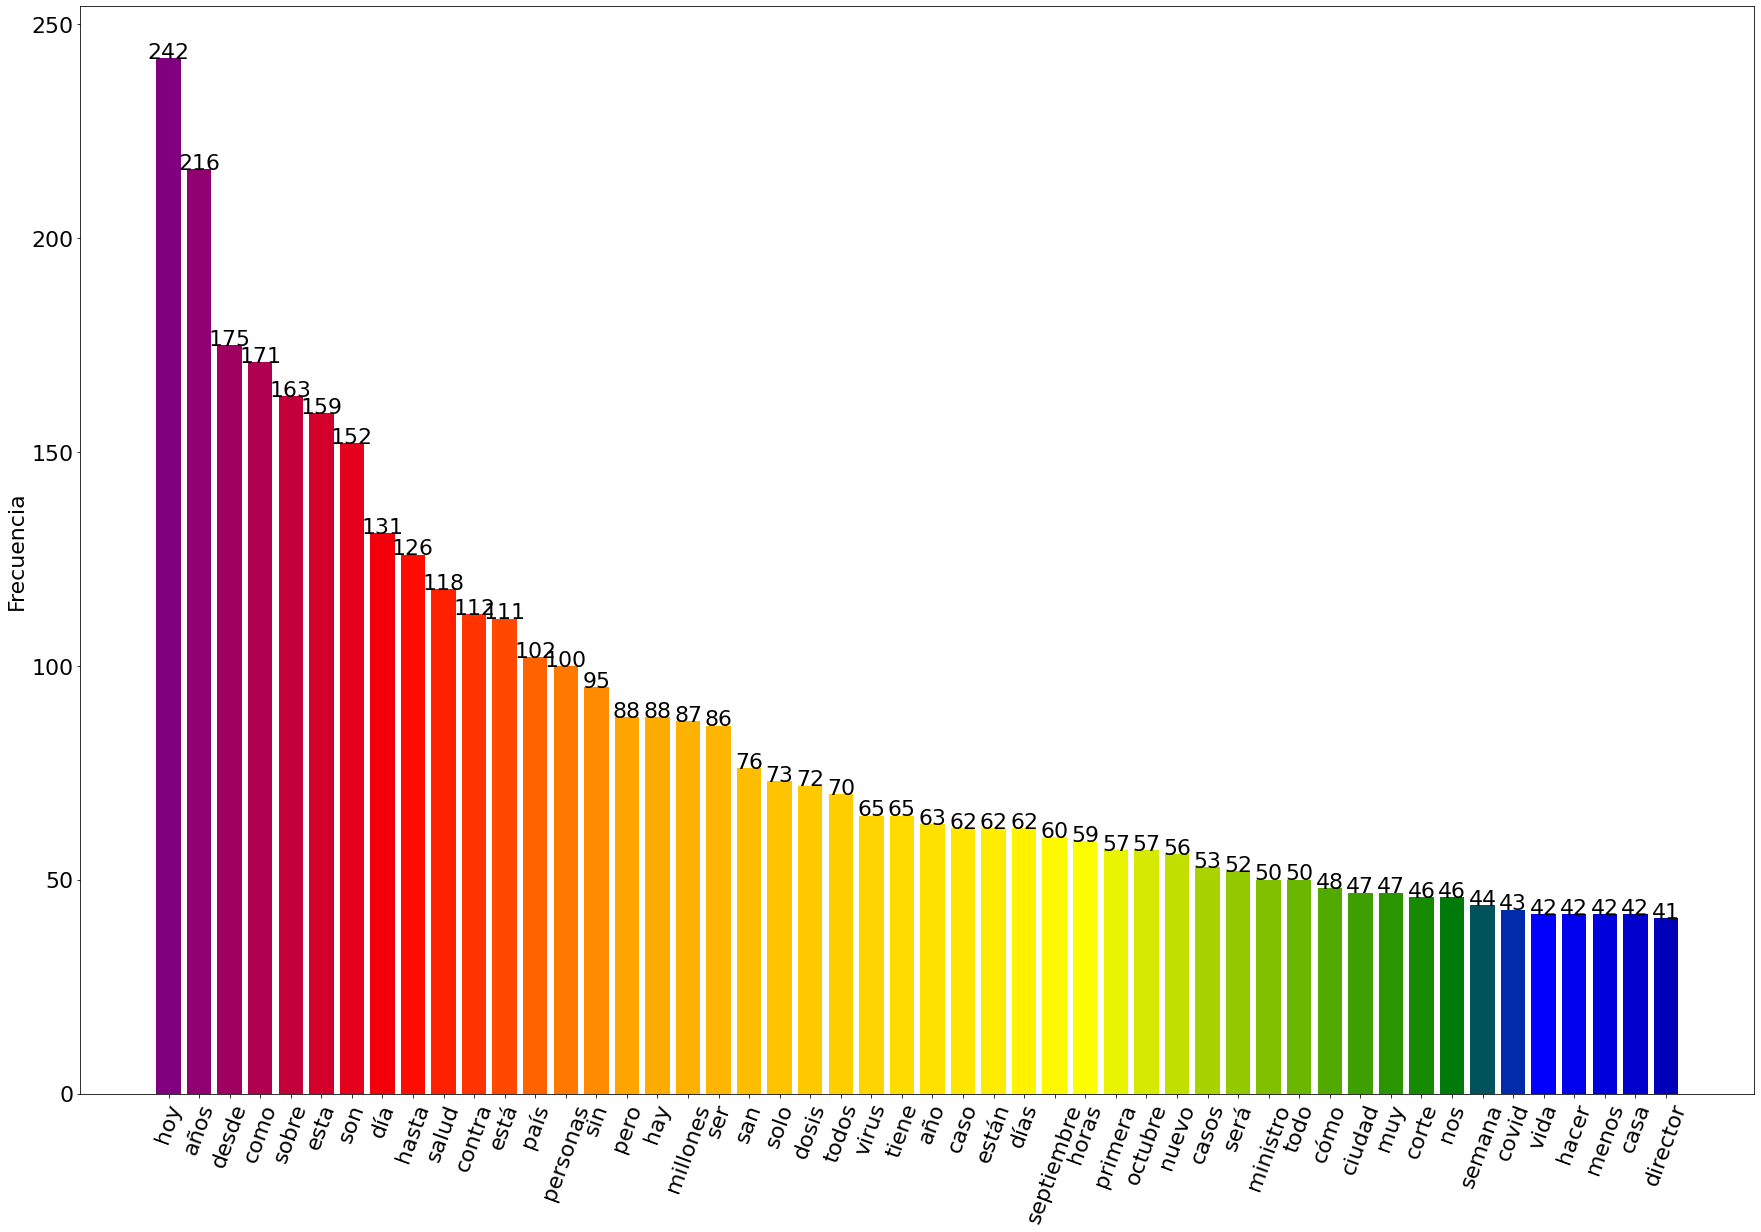

In [49]:
%store -r lista_interseccion
barplot(lista_interseccion)

In [50]:
%store -r set_2
%store -r set_1

union = set_1 + set_2

#eliminar palabra de menos de tres letras
for i in union:
    if len(i) < 3:
        union.remove(i)

%store union


Stored 'union' (list)


### frecuencia de palabras de la union

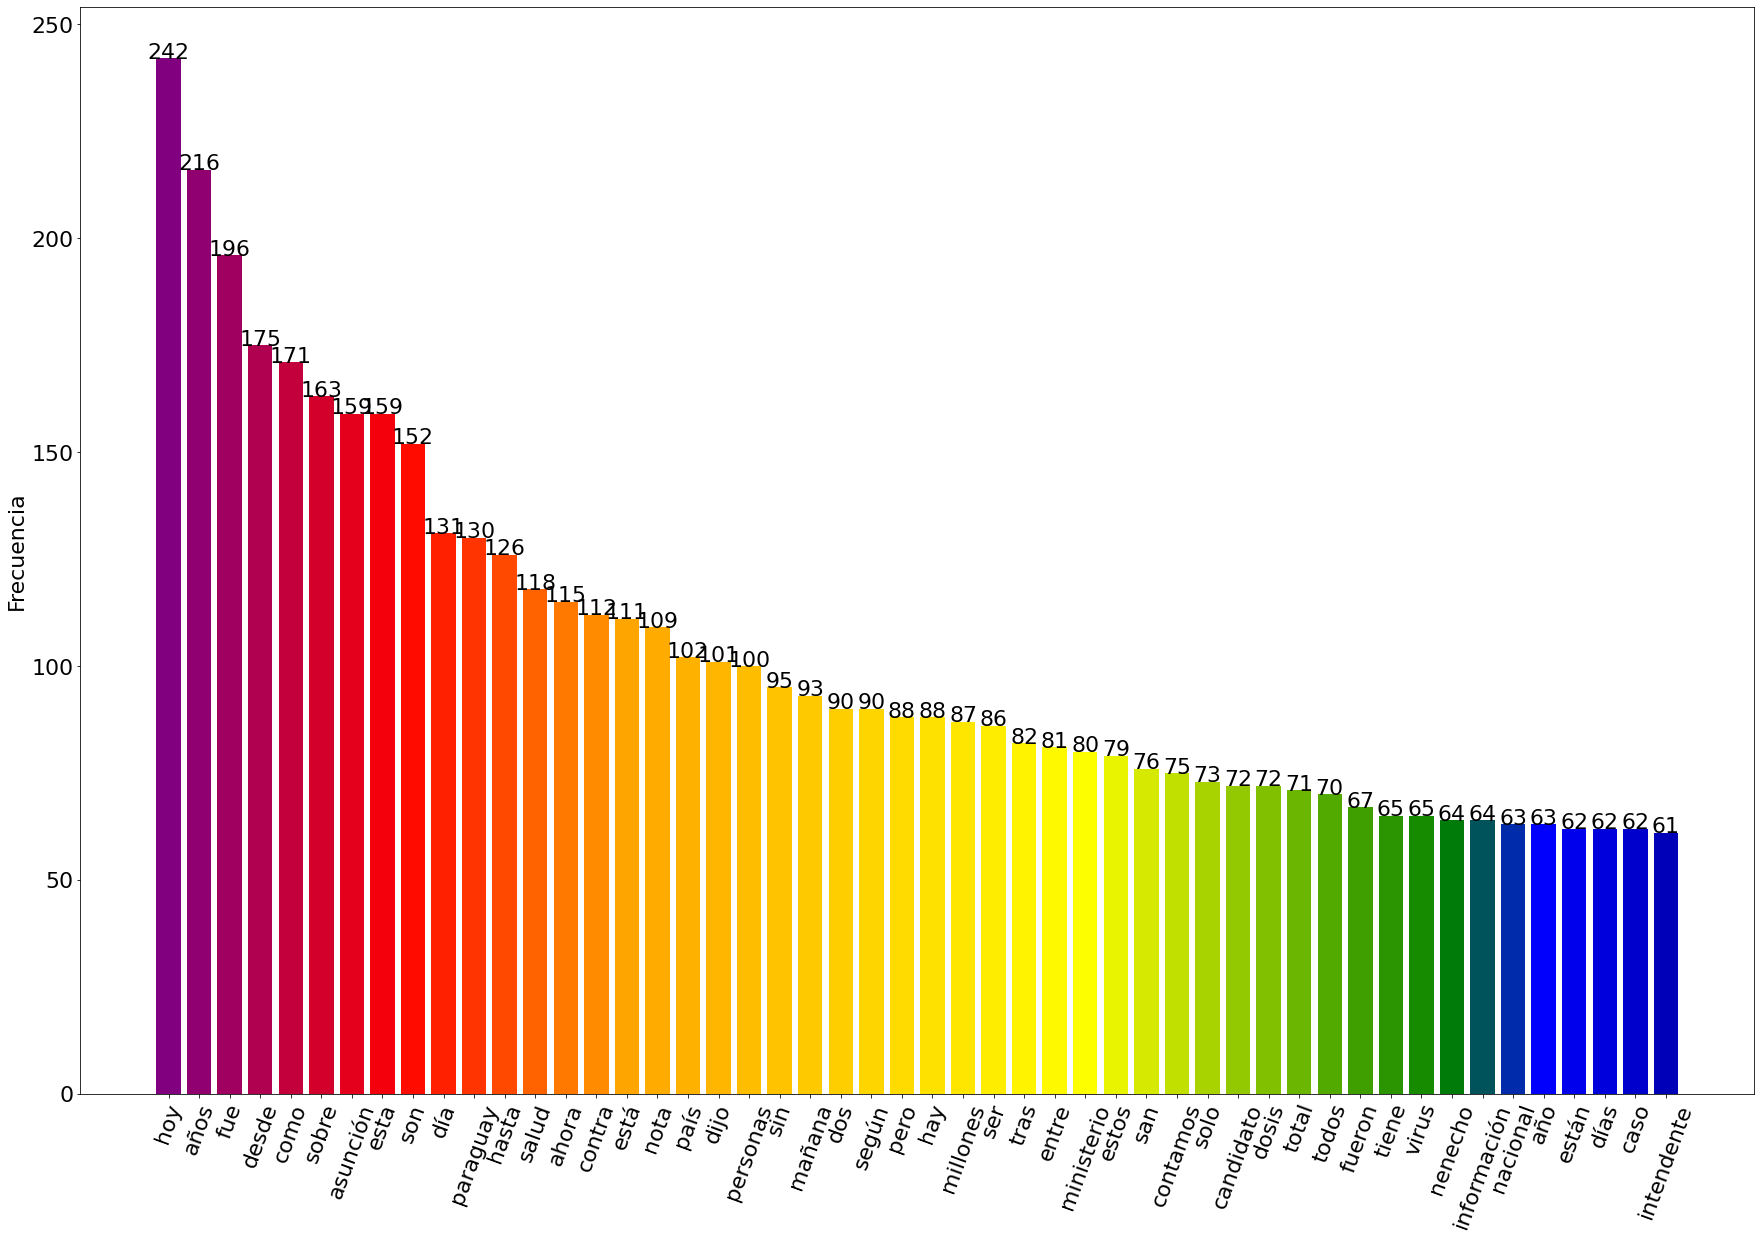

In [51]:
%store -r union
barplot(union)

In [282]:
#la cofiguracion de tamanho de fuente en barplot tambien afecta a countplot
#countplot( pd.DataFrame(union, columns =['palabras']))

In [74]:
#Hacer un gráfico de número de tweets por fecha. En el eje x las fechas, en el eje y el número de tweets

%store -r user_timeline_tweets
%store -r tweets

fechas = []
nro_tweets = []


for t in user_timeline_tweets:
    
    fecha = str( t.created_at.date() )
    
    #si al fecha no esta en la lista, incluir
    if not (fecha in fechas):
        fechas.append(fecha)
        nro_tweets.append(0)
    
    index = fechas.index(fecha)
    nro_tweets[index] +=1    

    
for t in tweets:
    
    fecha = str( t.created_at.date() )
    
    #si al fecha no esta en la lista, incluir
    if not (fecha in fechas):
        fechas.append(fecha)
        nro_tweets.append(0)
    
    index = fechas.index(fecha)
    nro_tweets[index] +=1    
        
#print(fechas)
#print(nro_tweets)
#print(len(tweets))
#print(len(user_timeline_tweets))
%store fechas
%store nro_tweets


Stored 'fechas' (list)
Stored 'nro_tweets' (list)


### Numero de tweets por fecha

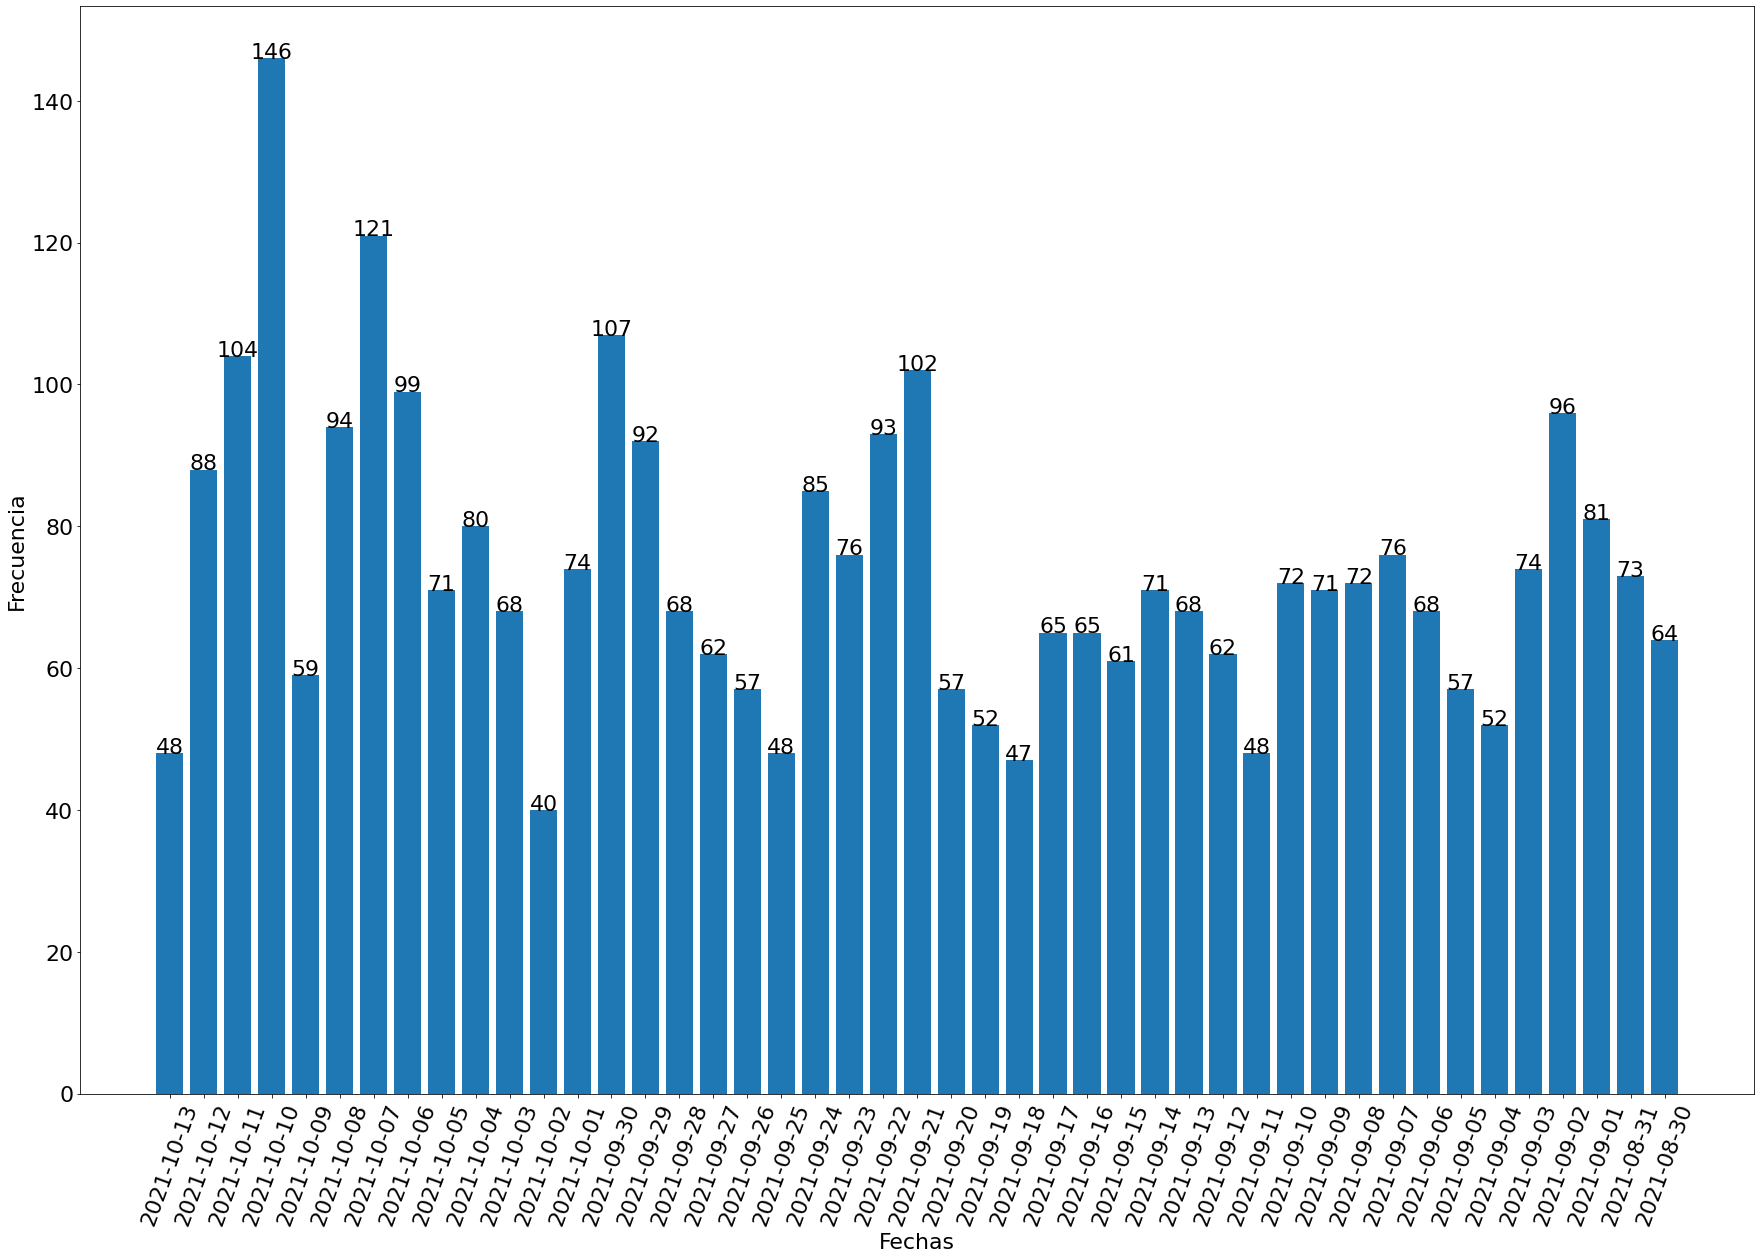

In [75]:
%store -r fechas
%store -r nro_tweets

barplot_2(fechas,nro_tweets)
#print(fechas)
#print(nro_tweets)

In [87]:
#Mostrar el número de personas diferentes (usuarios) que escribieron tweets por fecha. En el eje x las fechas, en el eje y el número de usuarios.
%store -r user_timeline_tweets
%store -r tweets
%store -r fechas


###############MAL#############################3
usuarios = []
nro_usuarios = []

for f in fechas:
    nro_usuarios.append(0)


for t in user_timeline_tweets:
    
    fecha = str( t.created_at.date() )
    usuario = str( t.user.screen_name )
    
    if not (usuario in usuarios): #si no esta en la lista, no se tiene registrado su tweet
        usuarios.append(usuario)
        index = fechas.index(fecha)
        nro_usuarios[index] +=1
        
for t in tweets:
    
    fecha = str( t.created_at.date() )
    usuario = str( t.user.screen_name )
    
    if not (usuario in usuarios): #si no esta en la lista, no se tiene registrado su tweet
        usuarios.append(usuario)
        index = fechas.index(fecha)
        nro_usuarios[index] +=1
    
print(usuarios)
#print(fechas)
#print(nro_usuarios)

%store nro_usuarios

['ABCDigital', 'maribeltwitA', 'JeronimoTormo', 'cidetec_ipn', 'gerryangeles72', 'IPN_MX', 'Dagazrenfort', 'ItzamaLopezY', 'ipn_sad', 'MxJavierTapia', 'RadioIPNOficial', 'WilliamvergelH', 'alcaldiaocana', 'sol_linea', '8bitsdepoder', 'EsferaPublicaTV', 'MexiquenseTV', 'JulisaSalinas', 'AMXNoticias', 'r_u_b_e_n_00', 'migueliitoo_00', 'eloy_vr_00', 'Saramonica2018', 'CanalEncuentro', 'MateoAmen', 'Autoformato', 'AnaGlezCorpas', 'AsoAGOA', 'SmallGamiing', 'makewordsbot', 'patitorossi93', 'MilagrosChire_', 'ClaudioCarmon10', 'caryche_00', 'hartadezurdos', 'PiscianoTuitea', 'MrJonGabox', 'jorgeluisv10', 'opinionescl', 'mariajomar70', 'NormaAtachao', 'jorgecabral1201', 'ABCCardinal', 'elenatn_00', 'lidis7o', 'RamayoTamayo', 'Otherthings_00', 'mamahild', 'Rosamespoule', 'TribeBonaparte', 'roche200071', 'garciasmanuelf', 'emulenews', 'lalunaguau', 'Honey_LimitedEd', 'gladysestherseg', 'LaNauuv', 'medicblasto', 'martinfd78', 'super45', 'araya_salamanca', 'GarcPalomar', 'danielquimic', 'MiguelFG

In [86]:
#%store -r nro_usuarios
#%store -r fechas

#barplot_2(fechas,nro_usuarios)

In [ ]:
#arreglo...

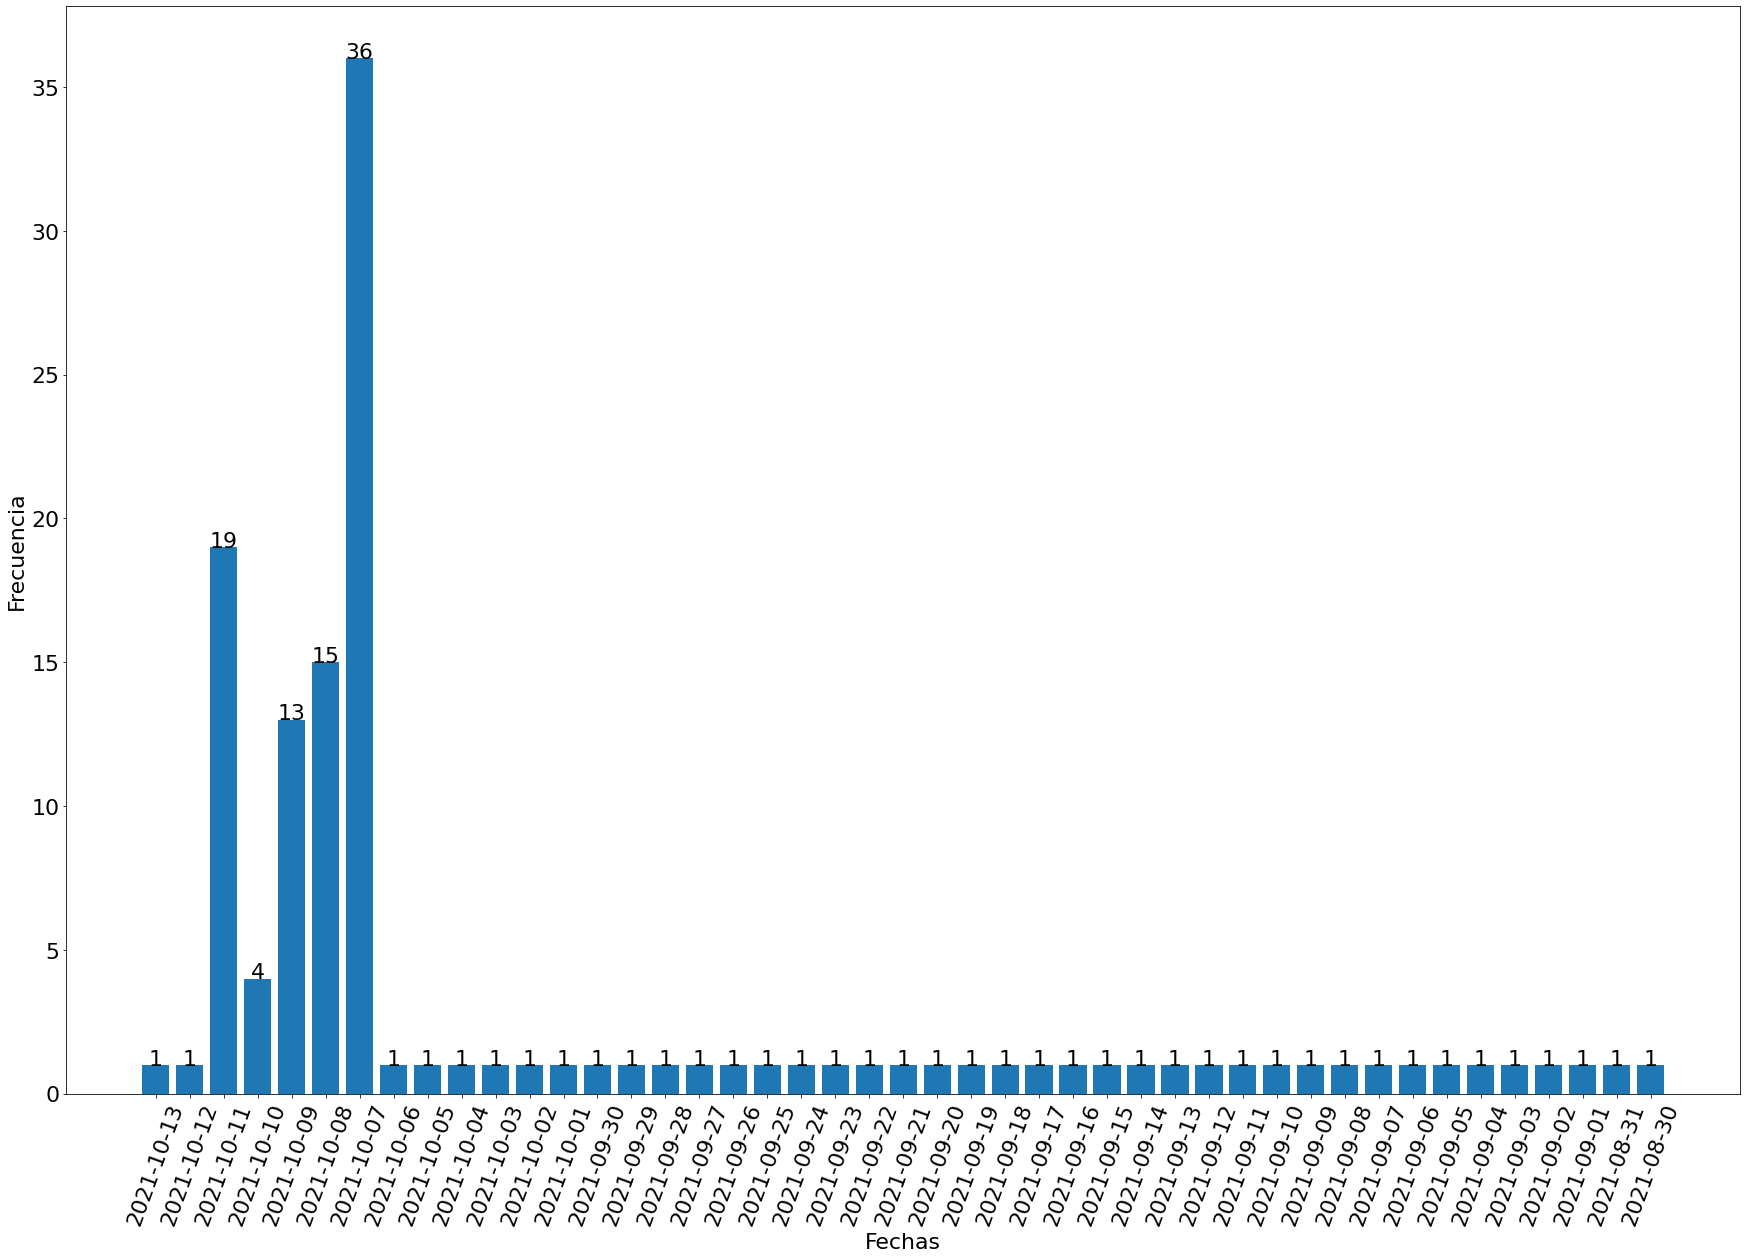

Stored 'nro_usuarios' (list)


In [85]:

#Mostrar el número de personas diferentes (usuarios) que escribieron tweets por fecha. En el eje x las fechas, en el eje y el número de usuarios.
%store -r user_timeline_tweets
%store -r tweets
%store -r fechas

usuarios = []
nro_usuarios = []
usuarios_en_fecha = []

for f in fechas:
    nro_usuarios.append(0)
    usuarios_en_fecha.append([])

    
for t in user_timeline_tweets:
    
    fecha = str( t.created_at.date() )
    usuario = str( t.user.screen_name )
    index = fechas.index(fecha)
        
    if not (usuario in usuarios_en_fecha[index]): #si no esta en la lista, no se tiene registrado su tweet
        usuarios_en_fecha[index].append(usuario)
        nro_usuarios[index] +=1
        
for t in tweets:
    
    fecha = str( t.created_at.date() )
    usuario = str( t.user.screen_name )
    index = fechas.index(fecha)
        
    if not (usuario in usuarios_en_fecha[index]): #si no esta en la lista, no se tiene registrado su tweet
        usuarios_en_fecha[index].append(usuario)
        nro_usuarios[index] +=1
        
        
barplot_2(fechas,nro_usuarios)
    
#print(usuarios)
#print(fechas)
#print(nro_usuarios)

%store nro_usuarios

### USUARIOS UNICOS QUE TUITEARON POR FECHA


#### Usuarios unicos por fecha
El usuario 1 que se ve desde el 13/10/2021 hasta 30/08/2021 es porque se trajo el timeline de ABC Color

# Usuarios que mas tuitearon

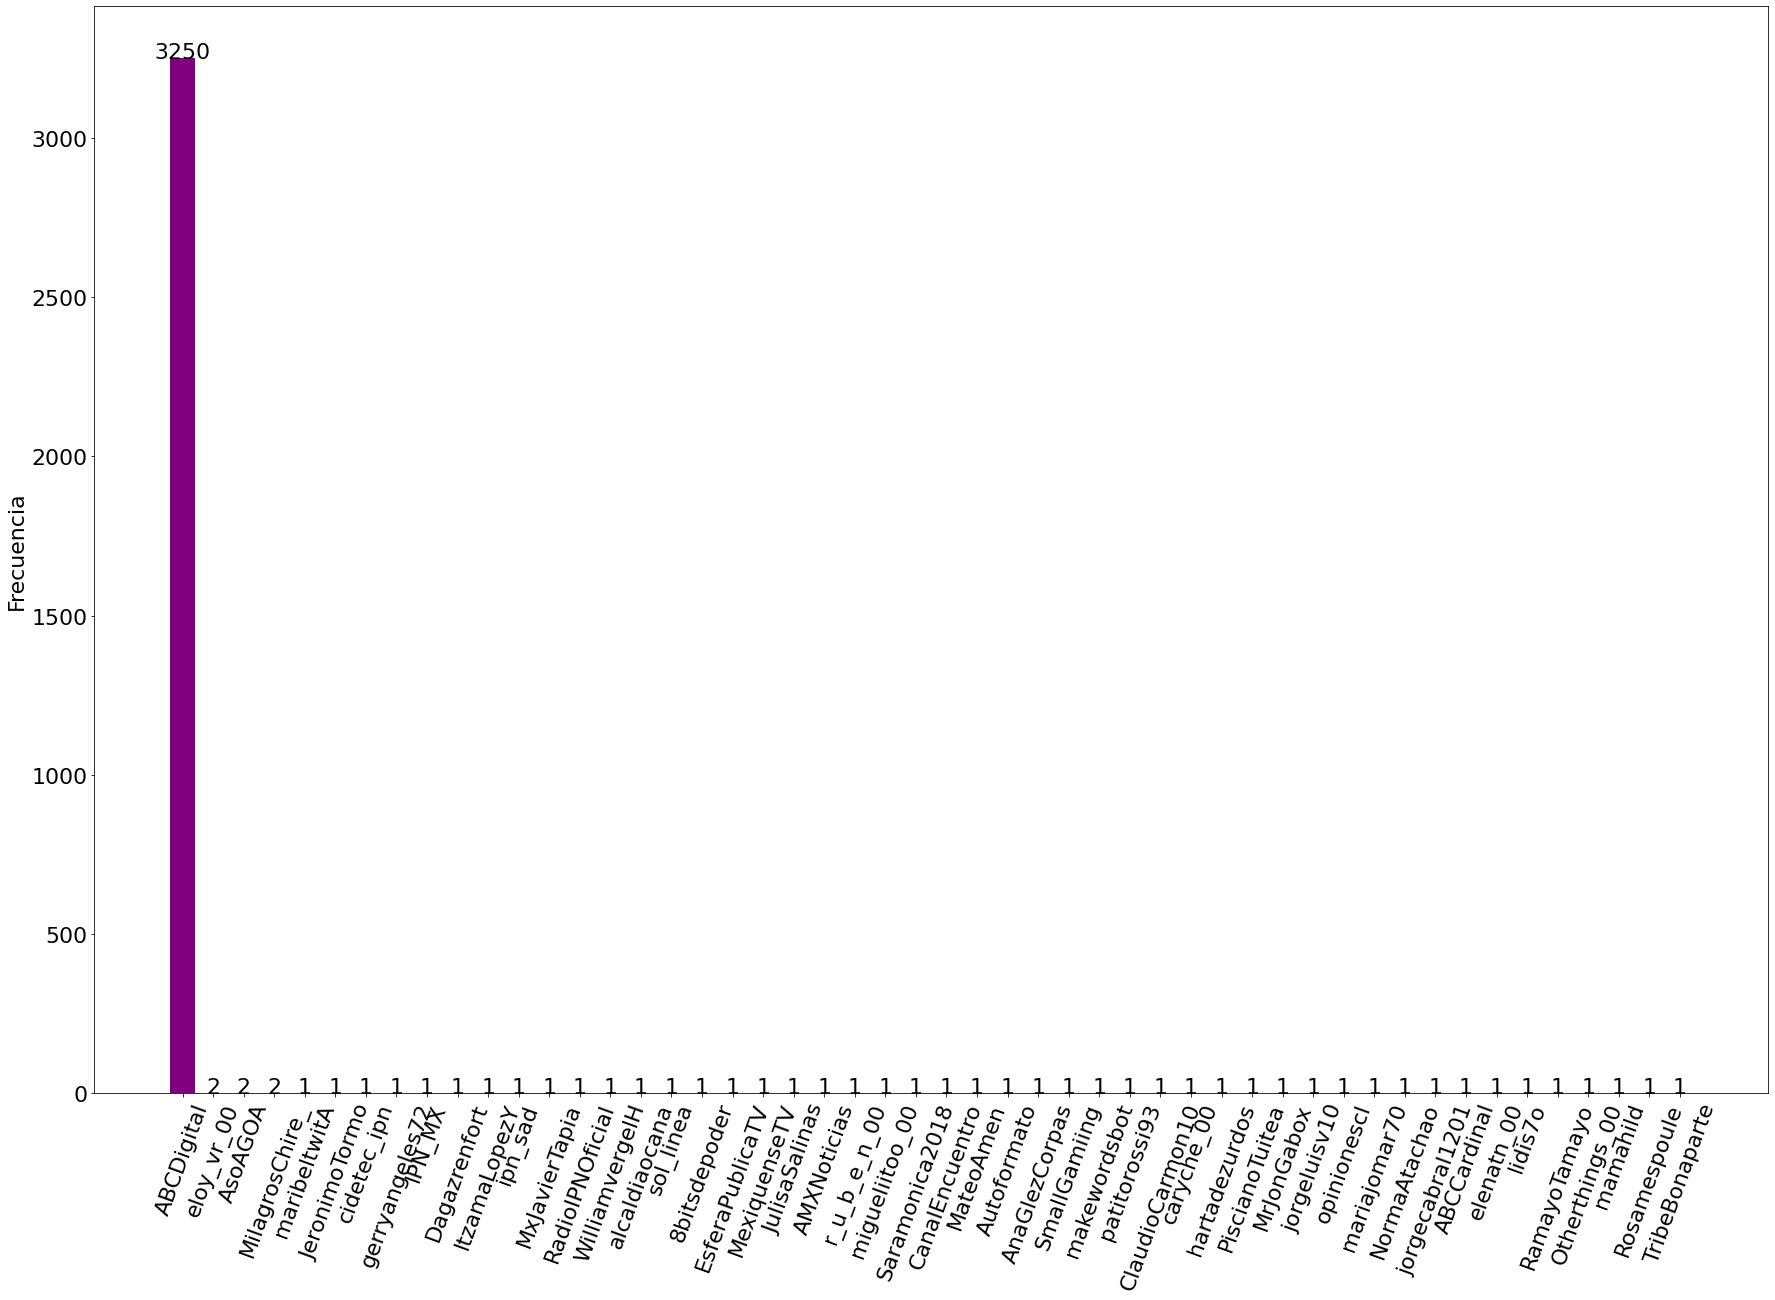

In [10]:
%store -r user_timeline_tweets
%store -r tweets


users1 = [t.user.screen_name for t in user_timeline_tweets]

users2 = [t.user.screen_name for t in tweets]

total = users1 + users2
total

barplot(total)


##### Usuarios que mas tuitearon
El que mas tuiteo fue ABC porque se trajo su timeline
